In [6]:
import cv2 as cv
import pandas as pd
import numpy as np
from matplotlib.pyplot import imshow
%matplotlib inline

In [46]:
MIN_PIX_AREA_CRACK=500 # 50*10

In [67]:
imgOriginal=cv.imread('../DSC_0185_2_2_fused.png')

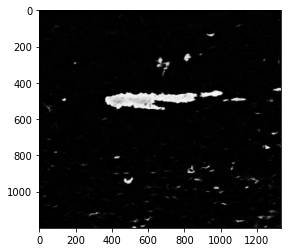

In [68]:
imshow(imgOriginal, cmap='gray')

In [78]:
def crack2object(image,connectivity=8):
    """
    Detect cracks, split and extracts data to a table with multiple characteristics
    
    Args:
        image (np.array): The image in numpy format with one channel (B/W).
        connectivity (int): [4,8,12] The method that connects cracks on the image.

    Returns:
        num_labels (): no info.
        labels (): no info.
        stats (): stats such as area, location, etc of each object connected.
        centroids (): centroid of each object connected. *2-dimensions
        
    Example:
        Converts a thresholded image from
        
        0 0 0 0 0 0 
        0 1 1 0 0 0
        0 0 0 0 1 1
        0 0 1 0 0 0 
        0 0 0 0 0 0

        to

        0 0 0 0 0 0
        0 1 1 0 0 0
        0 0 0 0 2 2
        0 0 3 0 0 0
        0 0 0 0 0 0
    
    """
    output = cv.connectedComponentsWithStats(image, 
                                            connectivity,
                                            cv.CV_32S)
    num_labels = output[0]   
    labels = output[1]
    stats = output[2]
    centroids = output[3] 
    
    return num_labels,labels,stats,centroids



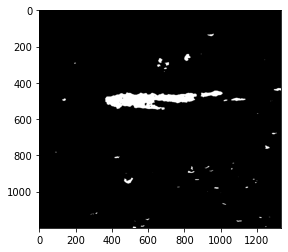

In [90]:
imgBW = cv.cvtColor(imgOriginal, cv.COLOR_BGR2GRAY)

ret,imgThr = cv.threshold(imgBW,
                     150,
                      255,
                      cv.THRESH_BINARY)
imshow(imgThr, cmap='gray')

height=imgThr.shape[0]
width=imgThr.shape[1]



In [95]:
np.mean(labels)

0.3416554138534634

In [93]:
num_labels, labels, stats, centroids=crack2object(x)

In [94]:
print(labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [75]:
df=pd.DataFrame(stats)
df.columns=['LEFT' , 'TOP' , 'WIDHT' ,'HEIGHT' , 'AREA']
df.head()

,LEFT,TOP,WIDHT,HEIGHT,AREA
0,0,0,1333,1200,1561219
1,928,130,34,14,260
2,891,241,5,2,8
3,800,242,35,39,822
4,657,265,23,27,400


In [99]:
df=df.sort_values(by='AREA',ascending=False)

# 0 area is the background
# area need to be less than the quart of the image
# area need have a min value
df=df[(df['AREA']<(height*width/4)) & (df['AREA']>MIN_PIX_AREA_CRACK)]
df['COD']=df.index
df

,LEFT,TOP,WIDHT,HEIGHT,AREA,COD
13,364,453,505,96,28823,13
12,890,443,122,38,2617,12
14,1059,483,79,18,862,14
3,800,242,35,39,822,3
33,468,923,50,33,798,33


In [96]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [111]:
def list_crack(df_labels_values_cod,image,labels):
    """
    Create a list of cracks filtered ready to be construct a new image
    
    Args:
        df_labels_value_cod (pandas.DataFrame) : dataframe that contains the statistics fields
        image (numpy.array) : array that contains the image in B/W
    
    Returns:
        list of images (numpy.array): list of numpy arrays
    
    """
    df_labels_values_cod=df_labels_values_cod['COD']
    values=df_labels_values_cod.to_numpy()    
    list_crack=[]
    h,w=image.shape[:2]

    for element in values:
        crack_img = np.zeros((h,w),np.uint8)
        pixel_x,pixel_y=np.where(labels==element)
        try:
            crack_img[pixel_x,pixel_y]=255
        except Exception as e:
            print(e)
        list_crack.append(crack_img) 
    print(f"Se ha actualizado lista_crack[]: {len(list_crack)}")
    return list_crack

lista_fisuras=list_crack(df,imgThr,labels)

Se ha actualizado lista_crack[]: 5


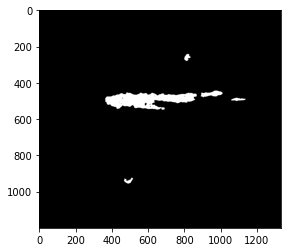

In [113]:
def list_crack2image(lista_fisuras):
    for m in range(len(lista_fisuras)):
        if m==0:
            sum_temp=lista_fisuras[0]
        if m<(len(lista_fisuras)-1):
            temp=lista_fisuras[m+1]
            sum_temp=np.add(sum_temp,temp)
    try:
        return sum_temp
    except:
        print("Error:No se pudo hacer plot, prueba reduciendo area mínima")


all_cracks=list_crack2image(lista_fisuras)

imshow(all_cracks, cmap='gray')